# Influence of the nature and wellbeing of a Country in its Co2 emissions

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Data sets
This analysis is based on date extracted from [Gapminder](https://www.google.com/url?q=http://www.gapminder.org/data/&sa=D&ust=1532469042121000), a website that has collected a lot of
information about how people live their lives in dierent countries, tracked across the years, and on a number of diferent indicators. 

I've focused my analysis on enviromental pollution and what influences it.

The analysis consists of the following indicators:
 
- [C02 Emission (tonnes per person)](https://cdiac.ess-dive.lbl.gov/)
Carbon dioxide emissions from the burning of fossil fuels (metric tonnes of C02 per person). 
This indicator has been chosen to analyze the ecological behaviour of each country, the more Co2 emissions a country makes the less ecological friendly it is.  

- [Forest coverage(%)](https://www.fao.org/forestry/sofo/en/)
Percentage of total land area that has been covered with forest during the given year.
This indicator has been chosen to analyze the amount of nature that surrounds the people in each country, and also to see its evolution accross the years. 

- [Democracy score](http://www.systemicpeace.org/inscrdata.html)
Summary measure of a country's democratic and free nature in all independent countries with total population greater than 500,000 in 2018. 
For a better understanding of this index, -10 is the lowest value and 10 the highest. 
This indicator has been chosen to understand the influece of the people on the countries' decisions. 
_This dataset was extracted directly from the sorucelink, since it was a newer version than the one provided in gapminder._

- [Human Development Index (HDI)](http://hdr.undp.org/en/indicators/137506)
Index used to rank countries by level of "human development". It contains three dimensions: health level, educational level and living standard. 


### Objective

The main purpose of this analysis is to understand if the wellbeing of the society (HDI), the democratic system (polity) or the surrounding nature (forest coverage) impact somehow its ecological impact (emissions of Co2). 
Do countries with a better democratic system, understood as a more influence of the people in its decisions, less Co2 emissions? Within these countries, does the wellbeing have an impact? Do people with a better education, health system and living standard impact on its countries ecological impact?
And lastly, has the amount of nature that surrounds these people impact on their actions? 

I'm interested in analyze the (most) current situation, and the relation between the indicators in different countries.

With the last variable, forest coverage, I also want to see if there is any relation between the increase of Co2 emissions and the decrease of the forest coverage. 

In [189]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

#### C02 Emission (tonnes per person) 

In [73]:
# Import the csv file as a dataframe
df_co2 = pd.read_csv('Data/co2_emissions_tonnes_per_person.csv')

#print first 10 lines
df_co2.head(10)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0529,0.0637,0.0854,0.154,0.242,0.294,0.412,0.35,0.316,0.299
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.3800,1.2800,1.3000,1.460,1.480,1.560,1.790,1.68,1.730,1.960
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.2200,2.9900,3.1900,3.160,3.420,3.300,3.290,3.46,3.510,3.720
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.3000,6.7500,6.5200,6.430,6.120,6.120,5.870,5.92,5.900,5.830
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.9800,1.1000,1.2000,1.180,1.230,1.240,1.250,1.33,1.250,1.290
5,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.8100,4.9100,5.1400,5.190,5.450,5.540,5.360,5.42,5.360,5.380
6,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.1400,4.4300,4.3800,4.680,4.410,4.560,4.600,4.57,4.460,4.750
7,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.4600,1.4800,1.7300,1.910,1.510,1.470,1.710,1.98,1.900,1.900
8,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.3000,17.8000,17.8000,18.100,18.200,17.700,17.400,17.00,16.100,15.400
9,Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0517,NaN,...,8.9900,8.7100,8.3900,8.280,7.490,8.030,7.690,7.31,7.280,6.800


In [74]:
# print shape to see the amount of countries (x) and amount of years (y)
df_co2.shape

(192, 216)

In [75]:
# Count missing values
# I'll check only the last 20 years of the dataset, because I want to use the most recent data
df_co2[df_co2.columns[-20:]].isna().sum()

1995    3
1996    3
1997    3
1998    3
1999    3
2000    3
2001    3
2002    2
2003    2
2004    2
2005    2
2006    2
2007    1
2008    1
2009    1
2010    1
2011    1
2012    0
2013    0
2014    0
dtype: int64

In [76]:
# Check the missing values
df_co2[df_co2[df_co2.columns[-20:]].isna().any(axis=1)]

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
96,Liechtenstein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.760,1.750,1.440,1.530,1.310,1.300,1.390,1.190
156,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.123,0.130,0.130
171,Timor-Leste,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.171,0.171,0.172,0.187,0.208,0.212,0.217,0.254,0.372,0.387


In [77]:
# Check for duplicated rows
df_co2.duplicated().sum()

0

Even though the dataset consists of a very wide range of years, I need only the most recent data. I'll compare the latest year of each dataset to define the year that I'll use for the analysis. 
But from this exploration, the data won't need much cleaning because it has almost no missing values and no duplicates. 



#### Human Development Index (HDI)

In [78]:
# Import the csv file as a dataframe
df_hdi = pd.read_csv('Data/hdi_human_development_index.csv')

#print first 10 lines
df_hdi.head(10)


,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,0.295,0.300,0.309,0.305,0.300,0.324,0.328,0.332,0.335,...,0.415,0.433,0.434,0.448,0.454,0.463,0.470,0.476,0.479,0.479
1,Albania,0.635,0.618,0.603,0.608,0.616,0.628,0.637,0.636,0.646,...,0.703,0.713,0.721,0.725,0.738,0.752,0.759,0.761,0.762,0.764
2,Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.609,0.617,0.627,...,0.690,0.697,0.705,0.714,0.724,0.732,0.737,0.741,0.743,0.745
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.819,0.819,0.843,0.850,0.857,0.858
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.454,0.468,0.480,0.488,0.495,0.508,0.523,0.527,0.531,0.533
5,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.781,0.786,0.788,0.783,0.782,0.778,0.781,0.782,0.784,0.786
6,Argentina,0.705,0.713,0.720,0.725,0.728,0.731,0.738,0.746,0.753,...,0.788,0.792,0.794,0.802,0.816,0.822,0.823,0.825,0.826,0.827
7,Armenia,0.634,0.628,0.595,0.593,0.597,0.603,0.609,0.618,0.632,...,0.707,0.721,0.725,0.720,0.729,0.732,0.736,0.739,0.741,0.743
8,Australia,0.866,0.867,0.871,0.874,0.876,0.885,0.888,0.891,0.894,...,0.918,0.921,0.925,0.927,0.927,0.930,0.933,0.936,0.937,0.939
9,Austria,0.794,0.798,0.804,0.806,0.812,0.816,0.819,0.823,0.833,...,0.860,0.864,0.870,0.872,0.880,0.884,0.887,0.892,0.892,0.893


In [79]:
# print shape to see the amount of countries (x) and amount of years (y)
df_hdi.shape

(187, 27)

This result is already very small compared to the Co2 emissions data set that consists of records from the last 216 years compared to 27 in this one. This will not be an issue, because only the last year is needed. There's also a difference in that value, the most recent year in this dataset is 2015 but in the Co2 emissions dataset was 2014. 
I'll check the next datasets, but so far **the year of analysis will be 2014**. 

There's also a **difference in the amount of countries** that should also be compared and unified before proceding with the analysis phase. 

In [80]:
# Count missing values in the last 21 years of the dataset
# since this dataset has one more year, and I want to see the data for the same range
df_hdi[df_hdi.columns[-21:]].isna().sum()

1995    40
1996    40
1997    40
1998    40
1999    37
2000    20
2001    20
2002    20
2003    18
2004    15
2005     6
2006     6
2007     6
2008     6
2009     6
2010     0
2011     0
2012     0
2013     0
2014     0
2015     0
dtype: int64

In [81]:
# Check for duplicated rows
df_hdi.duplicated().sum()

0

In [82]:
# Check the missing values
df_hdi[df_hdi[df_hdi.columns[-21:]].isna().any(axis=1)]

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.819,0.819,0.843,0.850,0.857,0.858
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.454,0.468,0.480,0.488,0.495,0.508,0.523,0.527,0.531,0.533
5,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.781,0.786,0.788,0.783,0.782,0.778,0.781,0.782,0.784,0.786
11,Bahamas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.790,0.791,0.791,0.788,0.788,0.789,0.790,0.789,0.790,0.792
19,Bhutan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.572,0.581,0.589,0.596,0.604,0.607
21,Bosnia and Herzegovina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.703,0.710,0.716,0.717,0.711,0.728,0.735,0.742,0.747,0.750
26,Burkina Faso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.334,0.345,0.356,0.365,0.377,0.384,0.392,0.398,0.399,0.402
31,Cape Verde,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.602,0.615,0.621,0.627,0.632,0.636,0.643,0.643,0.646,0.648
33,Chad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.306,0.338,0.343,0.360,0.370,0.381,0.387,0.390,0.394,0.396
37,Comoros,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.459,0.461,0.465,0.476,0.479,0.484,0.490,0.497,0.498,0.498


Even though there are no duplicates, the data in the oldest years has several missing values, more than 20% of the countries in the dataset are missing data on the first years. 

For a better understanding of this index, I will label the scores using the interpretation table that can be found in the indicator documenattion. 

| Human development | Score   |
|-----------------------------|-------------|
| Very high | >= 0.800    |
| High | 0.700–0.799 |
| Medium | 0.550–0.699 |
| Low | < 0.550     |

I will check this values against the the 25th, 50th, and 75th percentile to evaluate if it represents the dataset. 

In [83]:
# I'll use he column from the year 2014 because it's the latest year that I'll use for the analysis
df_hdi[['country','2014']].describe()

,2014
count,187.000000
mean,0.695706
std,0.154876
min,0.347000
25%,0.570000
50%,0.724000
75%,0.804500
max,0.948000


The values are similar, I'll use the table from the instructions to label the data.

#### Forest coverage(%)

In [84]:
# Import the csv file as a dataframe
df_fc = pd.read_csv('Data/forest_coverage_percent.csv')

#print first 10 lines
df_fc.head(10)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,2.07,2.07,2.07,2.07,2.07,2.07,2.07,2.07,2.07,...,2.07,2.07,2.07,2.07,2.07,2.07,2.07,2.07,2.07,2.07
1,Albania,28.80,28.70,28.60,28.60,28.50,28.40,28.40,28.30,28.20,...,28.50,28.50,28.40,28.40,28.30,28.30,28.30,28.20,28.20,28.20
2,Algeria,0.70,0.70,0.69,0.69,0.69,0.68,0.68,0.67,0.67,...,0.68,0.71,0.74,0.77,0.81,0.81,0.81,0.81,0.82,0.82
3,Andorra,34.00,34.00,34.00,34.00,34.00,34.00,34.00,34.00,34.00,...,34.00,34.00,34.00,34.00,34.00,34.00,34.00,34.00,34.00,34.00
4,Angola,48.90,48.80,48.70,48.60,48.50,48.40,48.30,48.20,48.10,...,47.30,47.20,47.10,47.00,46.90,46.80,46.70,46.60,46.50,46.40
5,Antigua and Barbuda,23.40,23.30,23.30,23.20,23.10,23.10,23.00,22.90,22.90,...,22.30,22.30,22.30,22.30,22.30,22.30,22.30,22.30,22.30,22.30
6,Argentina,12.70,12.60,12.50,12.40,12.30,12.20,12.10,12.00,11.90,...,10.90,10.80,10.70,10.60,10.40,10.30,10.20,10.10,10.00,9.91
7,Armenia,NaN,NaN,11.80,11.80,11.70,11.70,11.70,11.70,11.70,...,11.70,11.70,11.60,11.60,11.60,11.60,11.60,11.70,11.70,11.70
8,Australia,16.70,16.70,16.70,16.70,16.80,16.80,16.80,16.80,16.80,...,16.50,16.40,16.30,16.10,16.00,16.10,16.10,16.20,16.20,16.20
9,Austria,45.70,45.80,45.90,46.00,46.00,46.10,46.20,46.30,46.30,...,46.70,46.70,46.70,46.70,46.80,46.80,46.80,46.80,46.90,46.90


In [85]:
# print shape to see the amount of countries (x) and amount of years (y)
df_fc.shape

(192, 27)

In this case the amount of countries matches with the Co2 indicator, but some values can still not be matching. 
The range of years matches the HDI dataset, and presents no problem with keeping the year 2014 for the analysis. 

In [86]:
# Count missing values in the last 21 years of the dataset
df_fc[df_fc.columns[-21:]].isna().sum()

1995    4
1996    4
1997    4
1998    4
1999    4
2000    2
2001    2
2002    2
2003    2
2004    2
2005    2
2006    0
2007    0
2008    0
2009    0
2010    0
2011    1
2012    1
2013    1
2014    1
2015    1
dtype: int64

In [87]:
# Check the missing values
df_fc[df_fc[df_fc.columns[-20:]].isna().any(axis=1)]

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
16,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.3,22.4,22.4,22.4,22.5,22.5,22.5,22.5,22.6,22.6
98,Luxembourg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5
112,Montenegro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,49.5,52.5,55.5,58.5,61.5,61.5,61.5,61.5,61.5,61.5
147,Serbia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.9,29.4,29.9,30.5,31.0,31.0,31.1,31.1,31.1,31.1
162,Sudan,12.9,12.9,12.8,12.7,12.6,12.6,12.5,12.4,12.3,...,11.8,11.7,11.6,11.5,11.5,NaN,NaN,NaN,NaN,NaN


Since there's only one country with missing data for the year 2014 out of the 192 countries that contain the dataset, I'll drop this country from the dataset. With the rest of the countries, missing data in the years before 2005 I'll compare with the rest of the datasets and then refill the data. 

In [88]:
# Check for duplicated rows
df_fc.duplicated().sum()

0

#### Democracy score (Polity)

This dataset was obtained from the official website, because it was more updated that the version provided by gapminder. 
The main difference is found in the format of the file, it's provided as an .xls format instead of .csv, contains more variables and the year is listed as one more column instead of being the first row of the dataset. 

In [89]:
# Import the excel file as a dataframe
df_polity = pd.read_excel('Data/p4v2018.xls')

#print first 10 lines
df_polity.head(10)

,cyear,ccode,scode,country,year,flag,fragment,democ,autoc,polity,...,interim,bmonth,bday,byear,bprec,post,change,d4,sf,regtrans
0,21800,2,USA,United States,1800,0,NaN,7,3,4,...,NaN,1.0,1.0,1800.0,1.0,4.0,88.0,1.0,NaN,NaN
1,21801,2,USA,United States,1801,0,NaN,7,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21802,2,USA,United States,1802,0,NaN,7,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21803,2,USA,United States,1803,0,NaN,7,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21804,2,USA,United States,1804,0,NaN,7,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,21805,2,USA,United States,1805,0,NaN,7,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,21806,2,USA,United States,1806,0,NaN,7,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,21807,2,USA,United States,1807,0,NaN,7,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,21808,2,USA,United States,1808,0,NaN,7,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,21809,2,USA,United States,1809,0,NaN,9,0,9,...,NaN,3.0,5.0,1809.0,1.0,9.0,5.0,1.0,NaN,2.0


In [90]:
# The indicator we need, and that was listed in Gapminder is polity2
# Only the columns Country, year and polity2 are needed
df_polity = df_polity[['country','year','polity2']]
df_polity.sample(10)

,country,year,polity2
9846,Guinea-Bissau,1986,-8.0
17150,Australia,1903,10.0
3189,Brazil,1934,-7.0
16237,Nepal,1842,-6.0
6656,Austria,1875,-4.0
8003,Greece,1876,9.0
13900,Saudi Arabia,1926,-10.0
14199,Bahrain,1995,-9.0
14385,Oman,1866,-6.0
13364,Turkey,1970,8.0


In [91]:
# the dataset is formatted diferently than the others, so it will have to be adapted to the format
# check columns in the dataset
df_polity.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 3 columns):
country    17562 non-null object
year       17562 non-null int64
polity2    17325 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 411.7+ KB


In [92]:
# Due to the difference in format I can't use shape to determine amount of years and countries
df_polity.nunique() 

country    195
year       219
polity2     21
dtype: int64

In [93]:
# Get year range
print(df_polity['year'].min(),"-", df_polity['year'].max())

1800 - 2018


This dataset has more recent data than the others, I'll have to limit this for the analysis. 
It also has more countries than the other dataframes, this will also be reduced once the list of countries gets unified. 

In [94]:
# Check for duplicated rows
df_polity.duplicated().sum()

1

In [95]:
# check the duplicated line
df_polity[df_polity.duplicated()]

,country,year,polity2
7897,Yugoslavia,1991,-5.0


Even though there's a line duplicated, the problem is that the dataset has countries, like Yugoslavia that just appeared, that don't exist anymore. And this will not be a problem after keeping only the most recent records for each indicator. 

I'll check within the year 2014, which is the most recent year that has data in all datasets, and therefore will be used for the analysis. 

In [96]:
# Check amount of countries within the year range
df_polity.query('year == 2014').count()

country    167
year       167
polity2    166
dtype: int64

The amount of countries is less than the total amount of countries in the dataset, but still more than what I expect to have after the cleaning. 

There's only one record missing. 

In [97]:
#Check missing data within the year range
df_polity.query('year > 1994 and year < 2015').isna().sum()

country     0
year        0
polity2    52
dtype: int64

In [98]:
# Check the missing values
df_polity[df_polity.isna().any(axis=1)].query('year > 1994 and year < 2015').nunique()

country     6
year       20
polity2     0
dtype: int64

It's not so many countries with data missing (6 out of the 167) in the dataset.

After assessing the data there are the steps for cleaning the data will be:

**Formatting the data**
In order to analyze the data together I need to merge those dataframes and create one single dataframe where each indicator is a column. 
The expected output from the merged dataframes should have this format:

| Country   |year | Co2   | forest_coverage | HDI | polity2 |
|-----------|-----|-------|-----------------|-----|---------|
|     ...   | ... |  ...  |    ...          | ... |    ...  |


**Unifying list of countries and years**
Every dataframe has a different range of years and some countries differ from one another. All these values should be consistent accross dataframes. To accomplish that the merge between the dataframes should be an inner join, that way only countries and years existing in all dataframes will remain. 
The expected output will be the data belonging to the year range 1995-2014, that is present in all data sets. 

**Fill missing values**
Every dataframe has several data missing, but most of it will be dismissed during the inner join of the dataframes because it belongs to older years.

For visualization purposes, I'd like to keep most of the records instead of dropping the ones with missing data in order to have the first and the last observed value during the period. 

For the values that remain missing after the merge, I'll refill them using the backward fill method. This way the values will be consistent along time. 

With the remaining missing values, dropping them would leave an incosistent dataset that could generate fake outliers in the analysis, and similar would be filling with the mean, given that all of the indicadors can present a notable evolution over time, specially with the polity2 indicator. 


### Data Cleaning

#### Formatting the data and unifying list of countries and years 

In [99]:
# unpivot the data
df_co2 = df_co2.melt(id_vars=['country'], var_name=['year'])

# Use the indicator as a column name
df_co2.rename(columns={"value": "co2"}, inplace=True)

# Check the new structure
df_co2.head(10)

,country,year,co2
0,Afghanistan,1800,NaN
1,Albania,1800,NaN
2,Algeria,1800,NaN
3,Andorra,1800,NaN
4,Angola,1800,NaN
5,Antigua and Barbuda,1800,NaN
6,Argentina,1800,NaN
7,Armenia,1800,NaN
8,Australia,1800,NaN
9,Austria,1800,NaN


In [100]:
# check the new structure columns
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41280 entries, 0 to 41279
Data columns (total 3 columns):
country    41280 non-null object
year       41280 non-null object
co2        16905 non-null float64
dtypes: float64(1), object(2)
memory usage: 967.6+ KB


In [101]:
# unpivot the data
df_fc = df_fc.melt(id_vars=['country'], var_name=['year'])

# Use the indicator as a column name
df_fc.rename(columns={"value": "forest_coverage"}, inplace=True)

# Check the new structure
df_fc.head(10)

,country,year,forest_coverage
0,Afghanistan,1990,2.07
1,Albania,1990,28.80
2,Algeria,1990,0.70
3,Andorra,1990,34.00
4,Angola,1990,48.90
5,Antigua and Barbuda,1990,23.40
6,Argentina,1990,12.70
7,Armenia,1990,NaN
8,Australia,1990,16.70
9,Austria,1990,45.70


In [102]:
# check the new structure columns
df_fc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4992 entries, 0 to 4991
Data columns (total 3 columns):
country            4992 non-null object
year               4992 non-null object
forest_coverage    4882 non-null float64
dtypes: float64(1), object(2)
memory usage: 117.1+ KB


In [103]:
# unpivot the data
df_hdi = df_hdi.melt(id_vars=['country'], var_name=['year'])

# Use the indicator as a column name
df_hdi.rename(columns={"value": "human_development"}, inplace=True)

# Check the new structure
df_hdi.head(10)# check the new structure columns

,country,year,human_development
0,Afghanistan,1990,0.295
1,Albania,1990,0.635
2,Algeria,1990,0.577
3,Andorra,1990,NaN
4,Angola,1990,NaN
5,Antigua and Barbuda,1990,NaN
6,Argentina,1990,0.705
7,Armenia,1990,0.634
8,Australia,1990,0.866
9,Austria,1990,0.794


In [104]:
# check the new structure columns
df_hdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4862 entries, 0 to 4861
Data columns (total 3 columns):
country              4862 non-null object
year                 4862 non-null object
human_development    4322 non-null float64
dtypes: float64(1), object(2)
memory usage: 114.0+ KB


In [105]:
# Merge the dataframes in one
# co2, hdi and forest coverage can be easily merged because they have the same datatypes
df_combined = df_co2.merge(df_fc, how ='inner', on = ['country','year'])
df_combined = df_combined.merge(df_hdi, how ='inner', on = ['country','year'])

In [106]:
# melt function converted the year to a string value
# but in the polity2 dataframe it's type is int, because it was already formatted in the source file 
# change the type of the column to int to match polity and merge
df_combined['year'] = df_combined['year'].astype('int')
df_combined = df_combined.merge(df_polity, how ='inner', on = ['country','year'])

# Check the combined dataframe
df_combined.sample(10)

,country,year,co2,forest_coverage,human_development,polity2
2748,Mauritius,2008,3.040,18.9,0.734,10.0
2803,United Kingdom,2008,8.390,12.6,0.895,10.0
2913,Norway,2009,11.500,33.1,0.936,10.0
735,Bolivia,1995,1.300,56.7,0.571,9.0
1580,Senegal,2000,0.398,46.2,0.381,8.0
370,Nicaragua,1992,0.553,36.4,0.498,6.0
649,Liberia,1994,0.155,49.9,NaN,0.0
2652,United Kingdom,2007,8.600,12.6,0.892,10.0
781,Hungary,1995,5.830,20.7,0.741,10.0
3467,Germany,2013,9.320,32.7,0.920,10.0


In [107]:
# Keep records from the last 20 years only (1995-2004)
df_combined = df_combined.query('year>1994')

In [108]:
# count countries
df_combined.nunique() 

country               151
year                   20
co2                  1564
forest_coverage       963
human_development     653
polity2                21
dtype: int64

In [109]:
# Check size
df_combined.shape

(2995, 6)

The size is not divisible by the amount of years, which means that some countries don't have all idicators for one or more years. I'll identify them and drop them. 

In [110]:
#Group by year and count contries per year
df_combined.groupby('year').size()


year
1995    149
1996    149
1997    149
1998    149
1999    149
2000    149
2001    149
2002    149
2003    149
2004    149
2005    149
2006    151
2007    151
2008    151
2009    151
2010    151
2011    151
2012    150
2013    150
2014    150
dtype: int64

There are at least 2 countries that are missing all indicators for the whole range of years, I'll drop thoise countries. 

In [111]:
# get countries that appear less than the amount of years
exc_cuntries = df_combined.country.value_counts().loc[lambda x: x<20].index.tolist()
exc_cuntries

['Sudan', 'Montenegro', 'Serbia']

In [112]:
# Keep countries that are not in the list I just create
df_combined = df_combined[~df_combined.country.isin(exc_cuntries)]

In [113]:
# Check size, it should have (151 countries - 3 excluded)*20 years = 2960 rows
df_combined.shape

(2960, 6)

I will now check the missing data to have an idea how much is still missing. 

In [114]:
#check missing data
df_combined.isna().sum()

country                0
year                   0
co2                    0
forest_coverage       10
human_development    148
polity2               31
dtype: int64

Now I'll refill the missing values with a backward fill, this method takes the propagates the non-null values backward. To avoid mixing data within countries I'll order the dataframe first.

In [115]:
df_combined.sort_values(by=['country', 'year'])
df_combined.fillna(method='bfill', inplace =True)

In [116]:
#check that all missing data has been filled
df_combined.isna().sum()

country              0
year                 0
co2                  0
forest_coverage      0
human_development    0
polity2              0
dtype: int64

In the case of the HDI data i'll label the countries depending on their score. 
To define the numbers where to "cut" the groups I'll use the ones from the table in the indicator's intructions plus the min and max value calculated. 

In [117]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [0.0,0.550,0.699,0.799,1]

In [118]:
# Labels for the Human developmentgroups
bin_names = ['Low', 'Medium', 'High', 'Very High']

In [119]:
# Creates acidity_levels column
df_combined['human_development'] = pd.cut(df_combined['human_development'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
df_combined.head()

,country,year,co2,forest_coverage,human_development,polity2
720,Afghanistan,1995,0.0727,2.07,Low,0.0
721,Albania,1995,0.6720,28.40,Medium,5.0
722,Algeria,1995,3.3000,0.68,Medium,-3.0
723,Angola,1995,0.7690,48.40,High,-2.0
724,Argentina,1995,3.6600,12.20,High,7.0


I will create a copy of it with only the data belonging to the last year of the data range, this one will be used to analyze the current situation. 

In [120]:
# get all columns except year
columns = [df_combined.columns.tolist()[0]] +df_combined.columns.tolist()[2:6]
columns

['country', 'co2', 'forest_coverage', 'human_development', 'polity2']

In [121]:
# Keep only data from 2014
df_current = df_combined.query('year == 2014')

#filter columns to drop year
df_current = df_current[columns]

#check the dataframe
df_current.head()

,country,co2,forest_coverage,human_development,polity2
3565,Afghanistan,0.299,2.07,Low,-1.0
3566,Albania,1.960,28.20,High,9.0
3567,Algeria,3.720,0.82,High,2.0
3568,Angola,1.290,46.50,Low,-2.0
3569,Argentina,4.750,10.00,Very High,8.0


The dataframes are ready to be analyzed. 

<a id='eda'></a>
## Exploratory Data Analysis

**Prepare data for analysis**
The analysis has two research questions:
1. Visualize the current situation and the relations between the indicators: for this purpose I will use only the most recent data, in the case of this dataset will be the year 2014

2. Visualize the evolution of the Co2 and the forest coverage indicators trough time: for this purpose I'll keep the dataset as formatted

### #1 - Does the country development influences its ecological behaviour?
Using the Human Index development we can identify the wellbeing of the people in each country, does this influences on how much they contaminate?

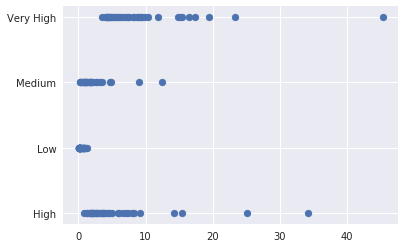

In [128]:
# plot relationship between human_development and Co2 emissions
plt.scatter(y = df_current['human_development'], x = df_current['co2']);

Even though it doesn't affect most of the records, it seems to be a tendency to higher co2 emissions in countries with High and Very high Human development index. 
The same tendency goes on the other direction for less developed countries and lower c02 emissions. 

In general it can be seen that countries with low development have the lowest amount of c02 emissions, and the highest emissions belong to countries with Very High development, followed by High development. 

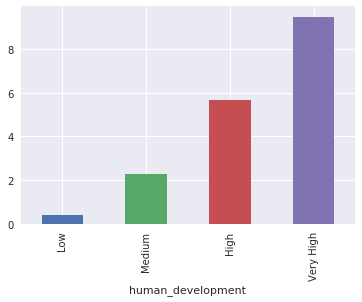

In [142]:
# plot distribution of co2 emissions per human development group
df_current['co2'].groupby(df_current['human_development']).mean().plot(kind='bar');

In this graph can be seen more clearly what was established on the scatter plot above, low countries have low emissions and the more developed the country it seems that the more it tends to have higher emissions. 

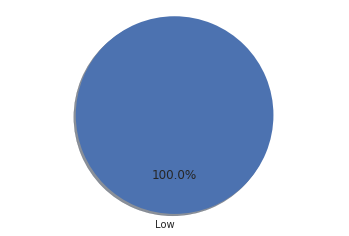

In [168]:
# Get the 5 countries that contaminate the least
labels = df_current.nsmallest(5, 'co2').human_development.unique()
sizes = [df_current.nsmallest(5, 'co2').human_development.size]

fig1, ax1 = plt.subplots()

ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

Again, there's no doubt that the lowest emissions of c02 are linked to countries with low development.

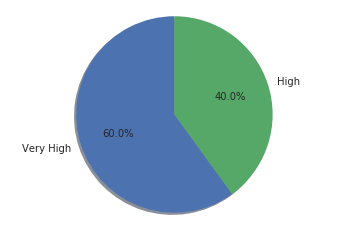

In [199]:
# Get the 5 countries that contaminate the least
labels = df_current.nlargest(5, 'co2').human_development.unique()
sizes = np.trim_zeros(df_current.nlargest(5, 'co2').human_development.value_counts().tolist())

fig1, ax1 = plt.subplots()

ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

In the case of the highest emissions, the countries belong to the high development categories. 

### #2 - Does the democracy score of a country influences on its CO2 emissions?
A country with a better democracy score means a country with more influence of the people's opinions on it's decisions. Does this influences on its ecological behaviour? 

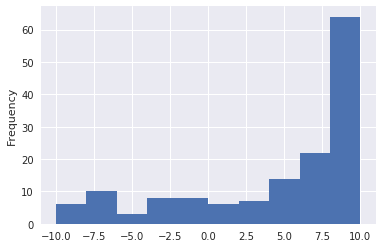

In [125]:
# I'll plot the distribution of democracy score to understand what to expect
df_current['polity2'].plot(kind='hist');

Countries tend to have a good democracy score, so there are no reasons to believe that it impacts on its CO2 emissions.

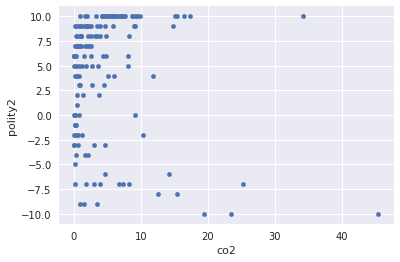

In [126]:
# plot relationship between democracy score and Co2 emissions
df_current.plot(x='co2',y='polity2',kind='scatter');

Even though most of the points are located in the higher left corner, where the mean of both values can be found, it can also be seen that the highest co2 emissions has presences associated with the lowest democracy score and in the best one. 

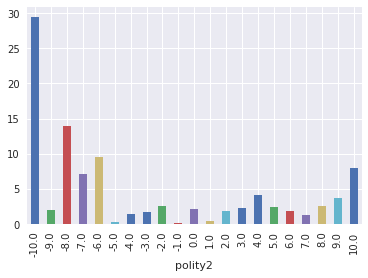

In [203]:
# plot distribution of co2 emissions per democracy score
df_current['co2'].groupby(df_current['polity2']).mean().plot(kind='bar');

Also in this graph, it doesn't seem to be a clear association between the two indicators, it seems like the CO2 emissions ocilates among the democracy scores. 
I'll check the top 5 countries that comunicate the most and the least. 

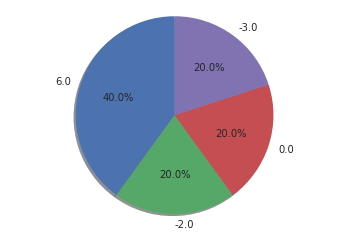

In [209]:
# Get the 5 countries that contaminate the least
labels = df_current.nsmallest(5, 'co2').polity2.unique()
sizes = np.trim_zeros(df_current.nsmallest(5, 'co2').polity2.value_counts().tolist())

fig1, ax1 = plt.subplots()

ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

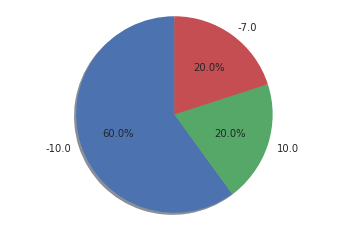

In [210]:
# Get the 5 countries that contaminate the least
labels = df_current.nlargest(5, 'co2').polity2.unique()
sizes = np.trim_zeros(df_current.nlargest(5, 'co2').polity2.value_counts().tolist())

fig1, ax1 = plt.subplots()

ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

There's no association that can be found between the two indicators, both graphs, the lowest and highest CO2 emissions are produced by countries that belong to the lowest and higest democracy scores.

### #2 - Does the nature that surrounds the country influences on its CO2 emissions?
A country with more nature around, a higher forest coverage, influences somehow the ecological behaviour of its people?

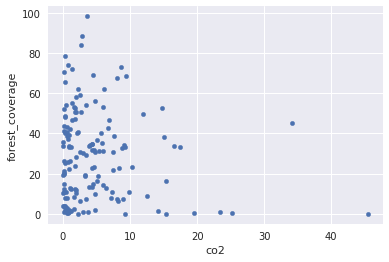

In [211]:
# plot relationship between forest_coverage score and Co2 emissions
df_current.plot(x='co2',y='forest_coverage',kind='scatter');

There's a higher concentration of dots in the lowest values, but it can also be seen that higher co2 emissions tend to be asocciated with lower forest coverage percentages. The same way, the highest forest coverage tends to belong to countries with low co2 emissions. 

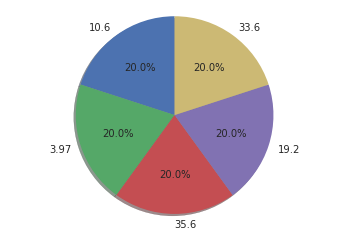

In [223]:
# Get the 5 countries that contaminate the least
labels = df_current.nsmallest(5, 'co2').forest_coverage.unique()
sizes = np.trim_zeros(df_current.nsmallest(5, 'co2').forest_coverage.value_counts().tolist())

fig1, ax1 = plt.subplots()

ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

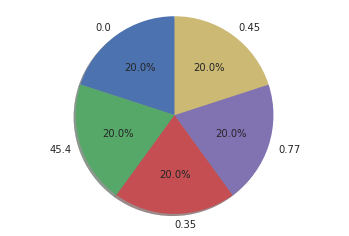

In [224]:
# Get the 5 countries that contaminate the least
labels = df_current.nlargest(5, 'co2').forest_coverage.unique()
sizes = np.trim_zeros(df_current.nlargest(5, 'co2').forest_coverage.value_counts().tolist())

fig1, ax1 = plt.subplots()

ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

Although it can be seen a slight tendency in countries that contaminate the most to have the lowest forest coverage percentage, it can also be seen some presence of a high forest coverage, above the mean value. 
It's not enough to confirm that there's a correlation between the indicators. 

### #3 - Is there a relation between the evolution of forest coverage and CO2 emissions?

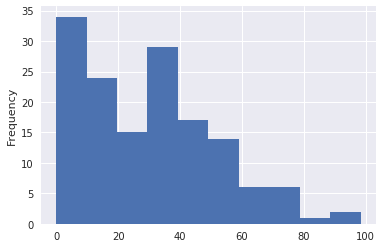

In [124]:
# plot distribution of forest coverage
df_current['forest_coverage'].plot(kind='hist');

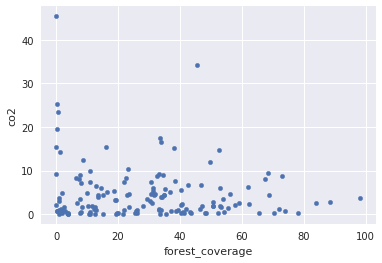

In [127]:
# plot relationship between forest_coverage and Co2 emissions
df_current.plot(x='forest_coverage', y='co2' ,kind='scatter');

In [62]:
# Calculate mean values per year
year_mean = df_combined.groupby('year').mean().reset_index()

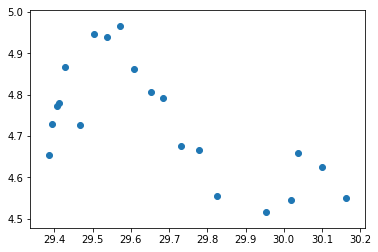

In [63]:
# plot relationship between human_development and Co2 emissions
plt.scatter(x = year_mean['forest_coverage'], y = year_mean['co2']);

There seems to be a negative association, but it's not very strong. I'll make a linear graph to see how the indicators evolved trough time. 

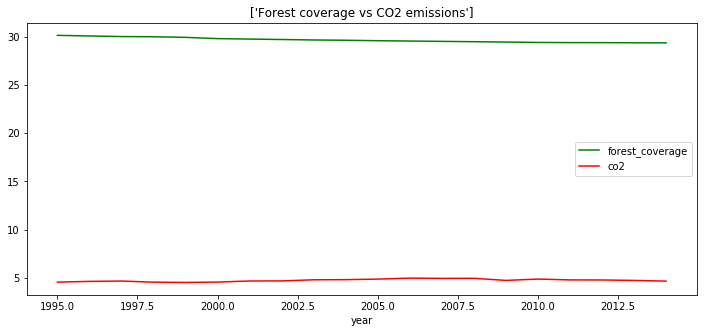

In [64]:
# Plot a time line for Forest coverage vs CO2 emissions
plt.figure(figsize=(12,5))


ax = plt.gca()
plt.title(['Forest coverage vs CO2 emissions'])

year_mean.plot(kind='line',x='year',y='forest_coverage',color='green', ax=ax)
year_mean.plot(kind='line',x='year',y='co2', color='red', ax=ax)

plt.show()

It can be seen in the graph that forest coverage decreased across the years, while co2 seems to have increased but on a slighter range. 

I'll calculate the correlation between variables

In [65]:
# calculate Pearson's correlation between co2 and forest_coverage
corr, _ = pearsonr(year_mean['co2'], year_mean['forest_coverage'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.664


 There's a strong negative correlation between the variables. 
 Since this can't be seen so easily in the previous graphs I would like to see each variable in a separate timeline, to show with better detailed how the indicator decreased in the case of the forest coverage and increased in the case of co2 emissions. 

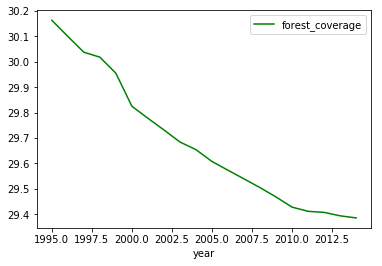

In [66]:
plt.figure(figsize=(12,5))

year_mean.plot(kind='line',x='year',y='forest_coverage',color='green')

plt.show();

With this graph the decreasing of forest coverage can be seen clearly, it has been quite steady and softens sligthly after 2010.

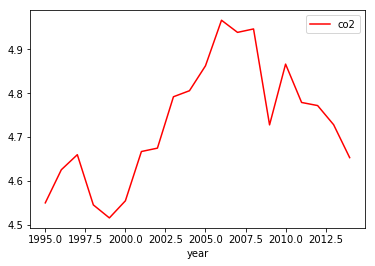

In [67]:
plt.figure(figsize=(12,5))

year_mean.plot(kind='line',x='year',y='co2', color='red')

plt.show()

This graphs shows in detail how the co2 emissions have been increasing over the years, specailly during the time range between the years 2000 and 2005. 

What is interesting is that the co2 emissions have been decreasing in the last years, a change of trend that didn't appear in the forest_coverage. 

I will take the data after 2009 to see it in more detail. 

In [68]:
# calculate Pearson's correlation between co2 and forest_coverage
year_mean_2010 = year_mean.query('year>2009')

corr, _ = pearsonr(year_mean_2010['co2'], year_mean_2010['forest_coverage'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.983


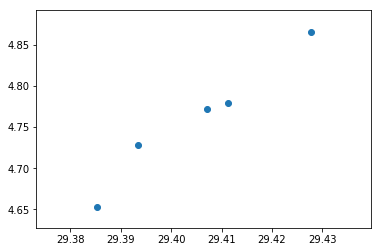

In [69]:
# plot relationship between human_development and Co2 emissions
plt.scatter(x = year_mean_2010['forest_coverage'], y = year_mean_2010['co2']);

The relation between variables changed from negative to a positive association in the last 4 years of the dataset. 
But the relation between the c02 emissions and the forest coverage seems to be very strong anyways. 


<a id='conclusions'></a>
## Conclusions

In conclusion, it can be seen that the only variable that seems to have some association with the co2 emissions of a country is its human development index. There is a tendecy in highly developed countries to produce higher CO2 emissions, the same way the lowest CO2 emissions tend to be associated with undeveloped countries. 

Although it can't be seen a strong relation between the forest coverage and the CO2 emissions of a country, it can be seen that trough time and in the global average, there tends to be a relation among the variables. It can also be seen how this relation changed in the last 5 years of the dataset, where the CO2 emissions average stopped increasing at a fast pace to start decreasing. 


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [227]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0